In [1]:
dt = 0.001 #milisekundy, 1/1000 sekundy
using Plots

In [141]:
# dane
g = 9.81
m = 65
vx₀ = 26.5
α = 45
vy₀=26.5
v₀=26.5
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5


0.5

In [142]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)

96.68750422060688

In [143]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

6.9454261245373194

In [144]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

**z wiaterkiem**

In [145]:
function vx_wind(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1)/ dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1)/ dt), 1)
    vxw[1] = v₀ * cos(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
    end
    return vxw
end

vx_wind (generic function with 1 method)

In [137]:
vw=2
vx_wind(v₀,vw, α, k, m, dt)

LoadError: [91mArgumentError: invalid Array dimensions[39m

In [139]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor
#brak czas_opor_wiatr

0

In [140]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt))

LoadError: [91mArgumentError: invalid Array dimensions[39m

In [138]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

LoadError: [91mArgumentError: invalid Array dimensions[39m

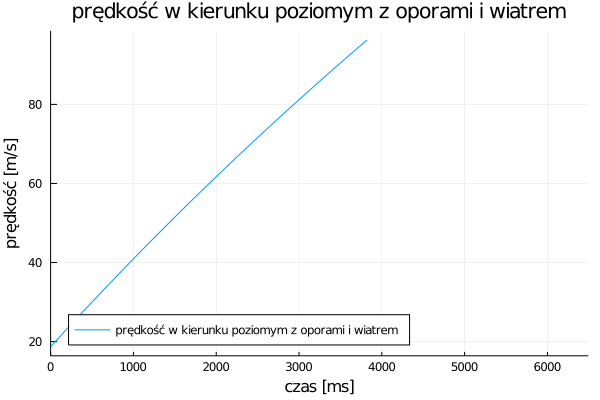

In [34]:
plot(vx_wind(v₀,vw, α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami i wiatrem",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym z oporami i wiatrem")

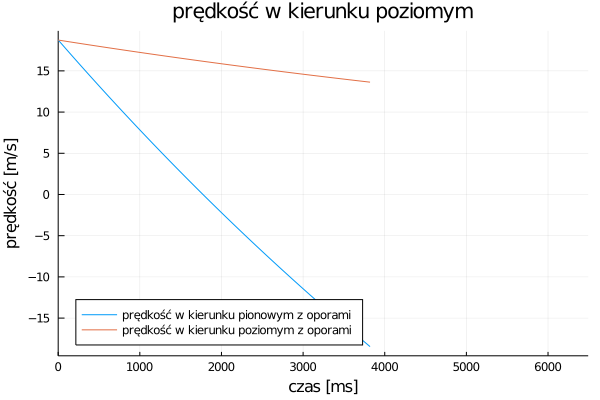

In [63]:
plot!(vx_num(v₀,α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym")

In [64]:
function vy_wind(v₀, vw, α, k, m, g, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        
    end
    return vy
end

vy_wind (generic function with 1 method)

In [50]:
vy_wind(v₀, vw, α, k, m, g, dt)

10197×1 Array{Float64,2}:
  18.738329701443508
  18.726958173968384
  18.715587594120553
  18.70421796182104
  18.692849276990888
  18.681481539551136
  18.67011474942284
  18.65874890652705
  18.64738401078484
  18.63602006211727
  18.624657060445426
  18.613295005690386
  18.601933897773243
   ⋮
 -59.32478657597536
 -59.3296528437607
 -59.33451870602372
 -59.33938416279822
 -59.34424921411799
 -59.349113860016814
 -59.35397810052848
 -59.35884193568677
 -59.36370536552546
 -59.36856839007834
 -59.37343100937917
 -59.37829322346172

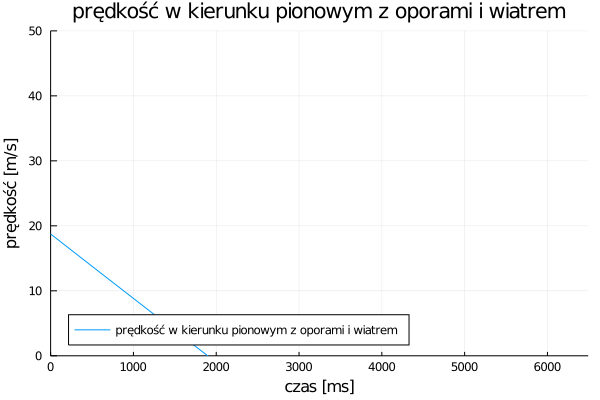

In [105]:
plot(vy_wind(v₀,vw, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim=(0,50),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami i wiatrem")

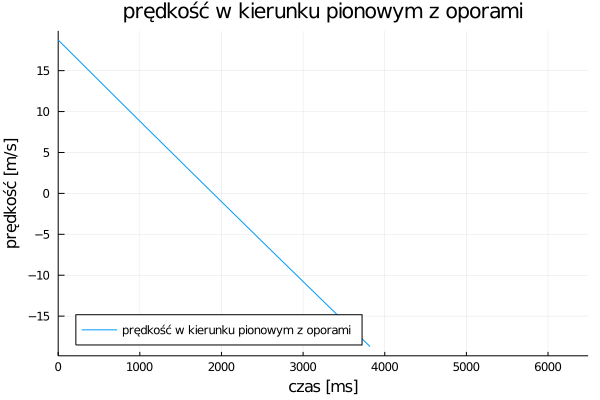

In [106]:
plot(vy_num(v₀, α, k, m, g,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym z oporami")

In [67]:
function x_wind(v₀,vw, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1) / dt), 1)
    vxw[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
        x[i] = x[i-1] + vxw[i-1] * dt - (1 / 2) * (k / m) * vxw[i-1] * dt ^ 2
    end
    return x
end 

x_wind (generic function with 1 method)

In [68]:
x_wind(v₀,vw, α, k, m, dt)

10197×1 Array{Float64,2}:
    0.0
    0.01873754893770595
    0.03749804871498661
    0.05628149778816916
    0.07508789461371239
    0.09391723764820666
    0.11276952534837394
    0.13164475617106777
    0.15054292857327323
    0.16946404101210696
    0.18840809194481717
    0.20737507982878356
    0.2263650031215174
    ⋮
 1159.8303120734627
 1160.0218411397
 1160.2133827230207
 1160.4049368227984
 1160.5965034384064
 1160.7880825692182
 1160.9796742146075
 1161.1712783739476
 1161.3628950466125
 1161.5545242319758
 1161.7461659294113
 1161.9378201382926

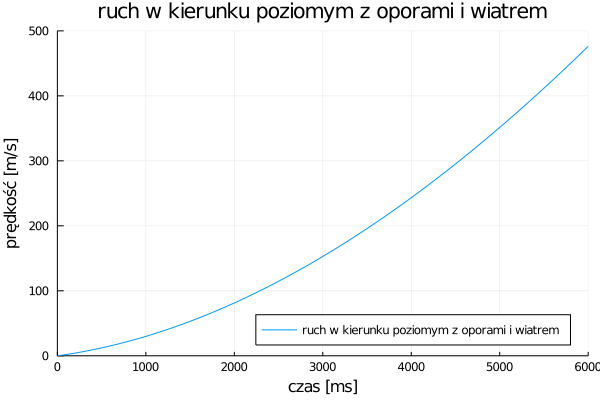

In [97]:
plot(x_wind(v₀,vw, α, k, m,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku poziomym z oporami i wiatrem",
    xlim = (0, 6000),
    ylim = (0, 500),
    legend = :bottomright,
    title = "ruch w kierunku poziomym z oporami i wiatrem")

In [84]:
function y_wind(v₀,vw, α, k, m,g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end 

y_wind (generic function with 2 methods)

In [85]:
y_wind(v₀,vw, α, k, m,g,h, dt)

10197×1 Array{Float64,2}:
   80.0
   80.01873264393771
   80.03745391682176
   80.05616381959973
   80.07486235321915
   80.09354951862741
   80.1122253167719
   80.13088974859988
   80.14954281505855
   80.16818451709501
   80.1868148556563
   80.20543383168936
   80.2240414461411
    ⋮
 -182.25983622922064
 -182.3191634489305
 -182.3784955347054
 -182.43783248613983
 -182.49717430282828
 -182.55652098436536
 -182.61587253034563
 -182.67522894036372
 -182.7345902140143
 -182.7939563508921
 -182.85332735059183
 -182.91270321270827

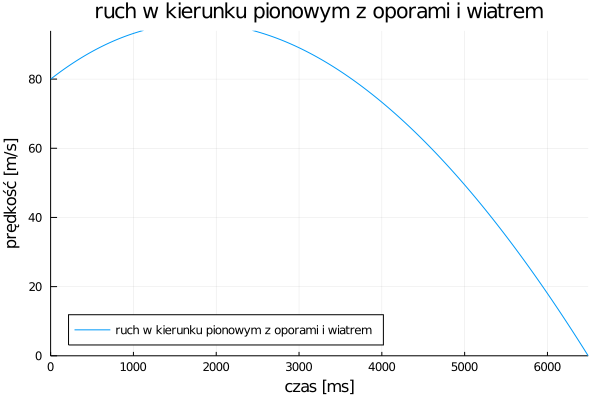

In [87]:
plot(y_wind(v₀,vw, α, k, m,g,h,dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "ruch w kierunku pionowym z oporami i wiatrem",
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    legend = :bottomleft,
    title = "ruch w kierunku pionowym z oporami i wiatrem")

In [131]:
m=90
plot(x_wind(v₀,vw, α, k, m, dt), y_wind(v₀, vw, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, 600),
    ylim = (0, 150),
    legend = :bottom,
    title = "tor ruchu")



LoadError: [91mArgumentError: invalid Array dimensions[39m

In [118]:
function v_wind(v₀, vw, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * sin(α)
    vyw = zeros(floor(Int, (czas+t1) / dt), 1)
    vyw[1] = v₀ * sin(α)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    vxw = zeros(floor(Int, (czas+t1) / dt), 1)
    vxw[1] = v₀ * cos(α)
    v = zeros(floor(Int, (czas+t1) / dt), 1)
    v[1] = sqrt(vxw[1]^2+vyw[1]^2)
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        vyw[i] = vyw[i-1] + ((vy[i-1]+vw)^2/vy[i-1]) * dt
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        vxw[i] = vxw[i-1] +((vx[i-1]+vw)^2/vx[i-1])* dt
        v[i]=sqrt(vxw[i-1]^2+vyw[i-1]^2)
        
    end
    return v
end

v_wind (generic function with 1 method)

In [119]:
v_wind(v₀, vw, α, k, m, g,h, dt)


10197×1 Array{Float64,2}:
  26.5
  26.5
  26.532458741041946
  26.56491047888723
  26.59735521366471
  26.629792945508648
  26.662223674558675
  26.694647400959767
  26.727064124862206
  26.75947384642156
  26.79187656579864
  26.824272283159456
  26.856660998675228
   ⋮
 349.93794481680436
 350.00685505178063
 350.07577592694423
 350.1447074420136
 350.21364959670717
 350.2826023907434
 350.35156582384076
 350.42053989571735
 350.4895246060916
 350.5585199546817
 350.6275259412059
 350.69654256538234

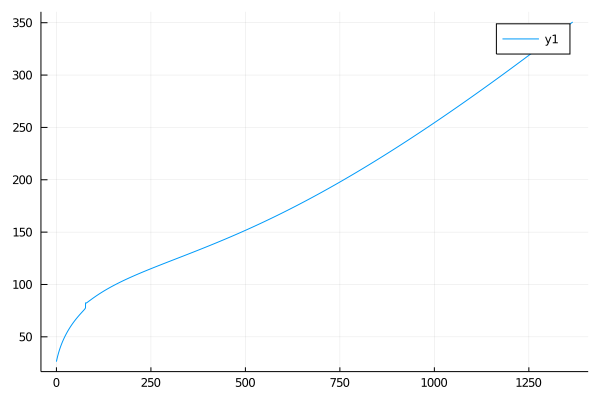

In [120]:
plot(x_wind(v₀, vw, α, k, m, dt),v_wind(v₀, vw, α, k, m, g,h, dt))